# Abusive Language detection using classification modelling.

This project aims at detecting and classifying strings as abusive or not.

### Hypothesis

Social Networking has advanced a lot in the last decade. Interacting with people has become so much easier. This advancement in socializing has also created new problems in society.
Abusive contents in social media has become a major concern. Targeted abuse and hate speech affects both individuals and groups equally. Major topics of concern are political, religious and ethnic variety, but it also includes personal contexts like a particular choice an individual makes. These kind of abuse and hate speech majorly target celebrities. Some of such contents could cause major psychological issues to the victim. Data analytics could be leveraged to solve this issue. Through this project, we aim to  develop a model that would detect abusive language, that could be implemented in potential social media platforms to make it safer and comfortable for everybody.

### Project proposal

- Abusive language detection is a classification problem.
- We will use Convolutional Neural Network to create the model.
- Existing NLP models are used to vectorize unstructured text data.
- These processed data are then used to train our model. 
- The final outcome of the model is as follows.
    - The model will take in a string as input.
    - It will then return a binary value, 0 meaning the string is abusive or 1 meaning the string is not abusive.
    - Using this classification obtained from our model, other platforms can implement further procedures to handle posts containing abusive strings. 
    
### Concept Note

The goal of our project is to efficiently detect abusive language and hate speech. This detection would help make social media platforms a better place for everybody. Using our model, social media platforms can detect if a post contains abusive contents or not, and act accordingly. This model will be able to effectively flag abusive contents and it could be used to raise respective alerts. It could help take fast actions to address the issue  and hence do not let the damage to be propagated and affect individuals. Main focus of this project is to make users on social media platforms feel safer. This could also help prevent hate campaigns on social media that targets a particular group of people. People are allowed to be sensitive and they are allowed to make their personal choices as they wish. Social medial platforms should not be a place to target such people.

## Data cleaning

Removed special characters, links and irrelevant columns.
Combined dataset 1 and dataset 2. Split the combined dataset into 70% training data and 30% validation data randomly.

### Loading of data and removal of irrelevant columns

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset1 = pd.read_csv('dataset1.csv', index_col='Unnamed: 0')

In [3]:
dataset1.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
print(f'Number of rows in dataset1: {dataset1.shape[0]}')

Number of rows in dataset1: 24783


In [5]:
dataset1.drop(['count', 'hate_speech', 'offensive_language', 'neither'],
               axis=1, inplace=True)

In [6]:
dataset1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
dataset2 = pd.read_csv('dataset2.csv', index_col='id')

In [12]:
dataset2.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [234]:
dataset2.rename(columns={'label': 'class'}, inplace=True)

In [235]:
print(f'Number of rows in dataset2: {dataset2.shape[0]}')

Number of rows in dataset2: 31962


### Removal of irrelevant data from the string.

In [106]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
additional = ['rt', 'rts', 'retweet', 'amp']
stopword=set().union(stopwords.words('english'), additional)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uvais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def process_tweet(tweet):
    try:
        tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(http\S*)|(www\S*)', ' ',tweet.lower()).split()
        tweet = [i for i in tweet if len(i) > 1]
        return ' '.join(tweet)    
    except:
        pass
    
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [238]:
dataset1['tweet'] = dataset1['tweet'].apply(process_tweet)
dataset2['tweet'] = dataset2['tweet'].apply(process_tweet)

In [240]:
dataset1['tweet'] = dataset1['tweet'].apply(clean_text)
dataset1['class'].replace(0, 1, inplace=True)
dataset1['class'].replace(2, 0, inplace=True)
dataset1.replace('', None, inplace=True)
dataset1.dropna(inplace=True)

dataset2['tweet'] = dataset2['tweet'].apply(clean_text)
dataset2.replace('', None, inplace=True)
dataset2.dropna(inplace=True)

In [241]:
dataset1.head()

,class,tweet
0,0,woman complain clean hous man alway take trash
1,1,boy dat cold tyga dwn bad cuffin dat hoe place
2,1,dawg ever fuck bitch start cri confus shit
3,1,anderson base look like tranni
4,1,shit hear might true might faker bitch told ya


In [242]:
dataset2.head()

,class,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit use caus offer wheelchair va...
2,0,bihday majesti
3,0,model love take time ur
4,0,factsguid societi motiv


In [243]:
dataset1.to_csv('cleaned_dataset1.csv')
dataset2.to_csv('cleaned_dataset2.csv')

## Visualization

In [149]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [150]:
cleaned_dataset1 = pd.read_csv('cleaned_dataset1.csv', index_col='Unnamed: 0')
cleaned_dataset2 = pd.read_csv('cleaned_dataset2.csv', index_col='Unnamed: 0')
cleaned_dataset = pd.concat([cleaned_dataset1, cleaned_dataset2])

In [151]:
cleaned_dataset.head()

,class,tweet
0,0,woman complain clean hous man alway take trash
1,1,boy dat cold tyga dwn bad cuffin dat hoe place
2,1,dawg ever fuck bitch start cri confus shit
3,1,anderson base look like tranni
4,1,shit hear might true might faker bitch told ya


#### Class distribution of dataset

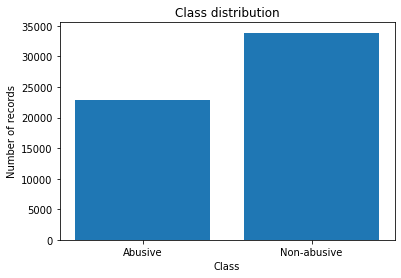

In [152]:
fig = plt.figure()
plt.bar(['Abusive', 'Non-abusive'], [(cleaned_dataset['class'] == 1).sum(), (cleaned_dataset['class'] == 0).sum()])
plt.ylabel('Number of records')
plt.xlabel('Class')
plt.title('Class distribution')
plt.show()
fig.savefig('visuals/jpeg/class.jpg')

#### Word count charts

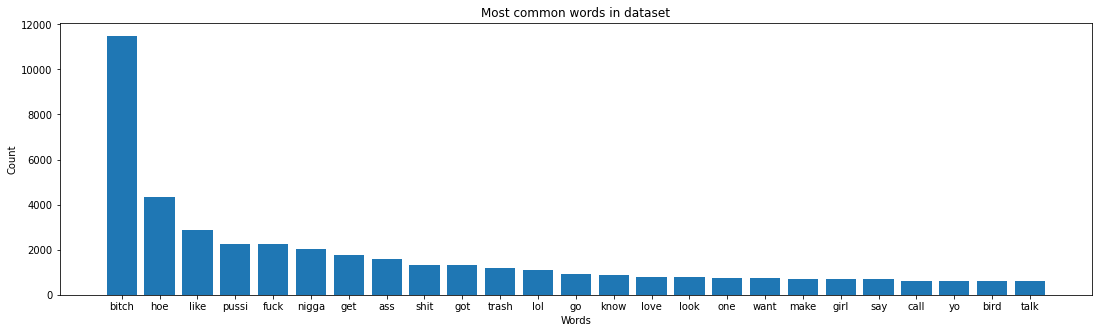

In [153]:
fig = plt.figure()
word_count = Counter(" ".join(cleaned_dataset1["tweet"]).split()).most_common(25)
word, count = zip(*word_count)
plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most common words in dataset')
fig.set_size_inches(18.5, 5)
plt.show()
fig.savefig('visuals/jpeg/common_words.jpg')

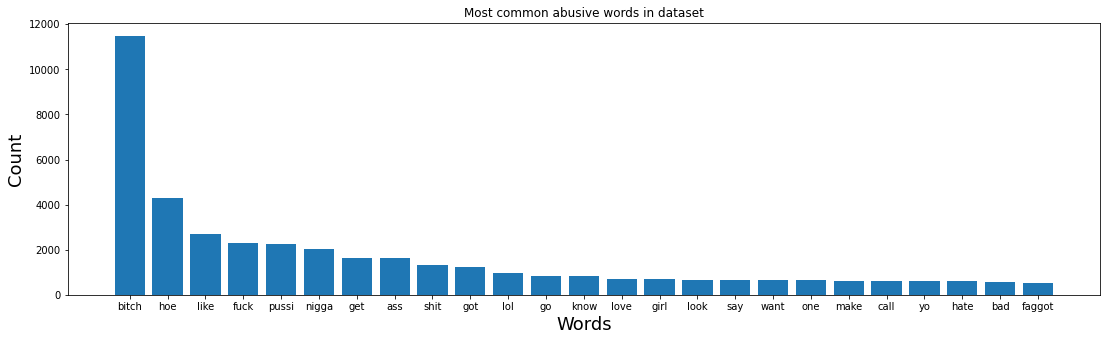

In [154]:
fig = plt.figure()
word_count = Counter(" ".join(cleaned_dataset[cleaned_dataset["class"] == 1].tweet).split()).most_common(25)
word, count = zip(*word_count)
plt.bar(word, count)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Most common abusive words in dataset')
fig.set_size_inches(18.5, 5)
plt.show()
fig.savefig('visuals/jpeg/most_common_abusive.jpg')

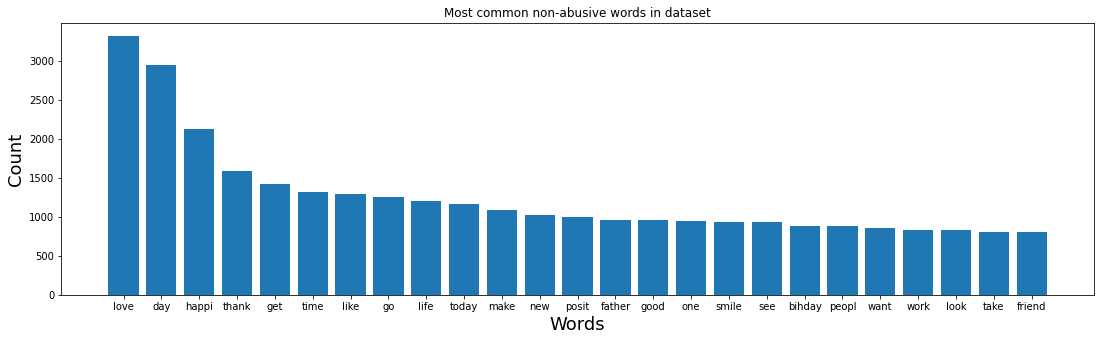

In [155]:
fig = plt.figure()
word_count = Counter(" ".join(cleaned_dataset[cleaned_dataset["class"] == 0].tweet).split()).most_common(25)
word, count = zip(*word_count)
plt.bar(word, count)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Most common non-abusive words in dataset')
fig.set_size_inches(18.5, 5)
plt.show()
fig.savefig('visuals/jpeg/most_common_non_abusive.jpg')

#### WordCloud

In [156]:
def show_word_cloud(tweet, message):
    tweet = ' '.join(tweet)
    tweet_wordcloud = WordCloud().generate(tweet)
    plt.title(message, fontweight="bold", color='black')
    plt.imshow(tweet_wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(f'visuals/jpeg/{message}.jpg')

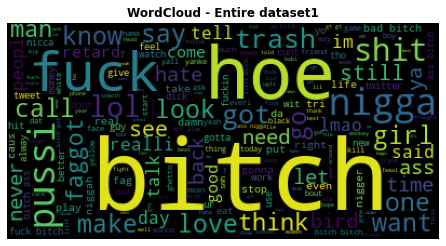

In [157]:
show_word_cloud(cleaned_dataset1['tweet'], 'WordCloud - Entire dataset1')

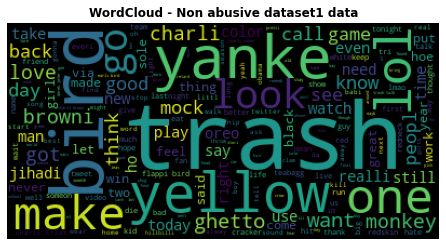

In [158]:
tweet = cleaned_dataset1[cleaned_dataset1["class"] == 0]['tweet']
show_word_cloud(tweet, 'WordCloud - Non abusive dataset1 data')

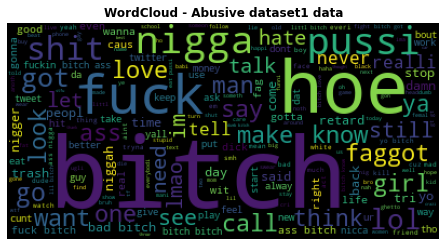

In [159]:
tweet = cleaned_dataset1[cleaned_dataset1["class"] == 1]['tweet']
show_word_cloud(tweet, 'WordCloud - Abusive dataset1 data')

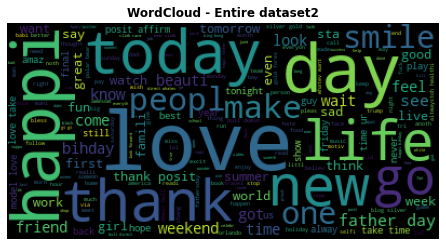

In [160]:
show_word_cloud(cleaned_dataset2['tweet'], 'WordCloud - Entire dataset2')

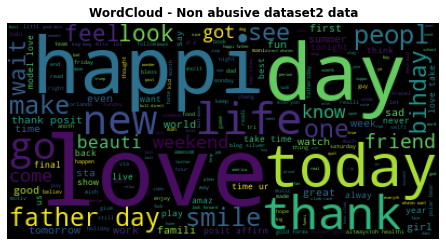

In [161]:
tweet = cleaned_dataset2[cleaned_dataset2["class"] == 0]['tweet']
show_word_cloud(tweet, 'WordCloud - Non abusive dataset2 data')

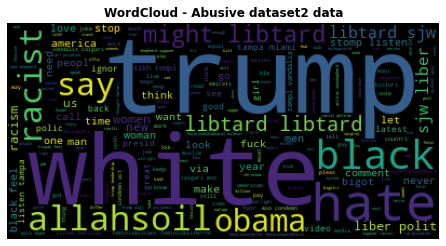

In [162]:
tweet = cleaned_dataset2[cleaned_dataset2["class"] == 1]['tweet']
show_word_cloud(tweet, 'WordCloud - Abusive dataset2 data')

## Model

- Deep learning model based on CNN.

- Used Tensorflow keras sequential model API to train the model.

- Trained the model in 5 epochs.

- Used ReLu and Sigmoid activation functions.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
additional = ['rt', 'rts', 'retweet', 'amp']
stopword=set().union(stopwords.words('english'), additional)

from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uvais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def process_tweet(tweet):
    try:
        tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(http\S*)|(www\S*)', ' ',tweet.lower()).split()
        tweet = [i for i in tweet if len(i) > 1]
        return ' '.join(tweet)    
    except:
        pass
    
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [3]:
def load_model():    
    return keras.models.load_model('model.h5py')

def load_tokenizer():
    with open('tokenizer_obj.pkl', 'rb') as file:
        return pickle.load(file)

In [4]:
def prepare_data_frame(df):
    df = process_tweet(df)
    return clean_text(df)

def prepare_string(string):
    return [prepare_data_frame(string)]

def tokenize(data, tokenizer):
    sequences = tokenizer.texts_to_sequences(data)
    return pad_sequences(sequences, maxlen=37, padding='post')

In [5]:
model = load_model()
tokenizer = load_tokenizer()

In [6]:
def predict_class(data, model=model, tokenizer=tokenizer):
    data = prepare_string(data)
    sequence = tokenize(data, tokenizer)
    return round(model.predict(sequence)[0][0])

## Testing model

In [7]:
test_data = pd.read_csv('test_data.csv', index_col='Unnamed: 0')
test_data.head()

,class,tweet
19417,1,say would let guy fall ground get wail second...
21556,0,funni shoot offic today stay tune pic come pho...
24386,0,waooooow hea hu right mean knew jame personn s...
29347,0,yes except happen side everyon lost one listen...
18801,0,curious georg curious littl monkey derang seri...


In [8]:
test_data['tweet'] = test_data['tweet'].apply(prepare_data_frame)
sequences = tokenizer.texts_to_sequences(test_data['tweet'])
X = pad_sequences(sequences, maxlen = 37, padding = 'post')
X = pd.DataFrame(X)
y = test_data['class']

In [9]:
loss, accuracy = model.evaluate(X, y, verbose=True)
accuracy

532/532 [==============================] - 2s 3ms/step - loss: 0.2548 - accuracy: 0.9363


0.9362664222717285

In [10]:
predict_class('This is really shit, whites sucks')

1

In [11]:
predict_class('Have a nice day, buddy')

0